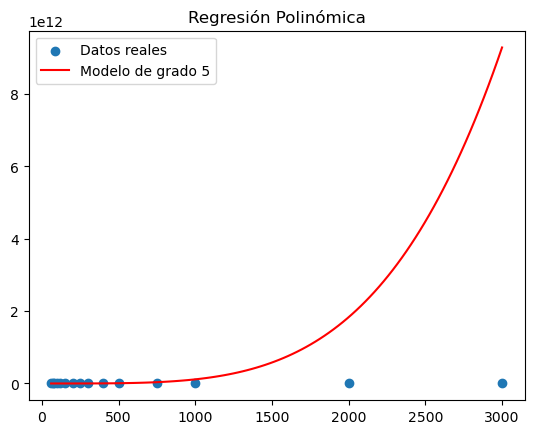

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos (reemplaza 'data.csv' con el nombre de tu archivo CSV)
data = pd.read_csv('p5.csv')

# Separar las características (X) y la variable objetivo (y)
X = data['araba_fiyat'].values
y = data['araba_max_hiz'].values

# Grado del polinomio
degree = 5

# Crear una matriz de diseño polinómico
X_poly = np.column_stack([X**d for d in range(1, degree + 1)])

# Resolver manualmente el sistema de ecuaciones normales para ajustar el modelo
X_poly_transpose = X_poly.transpose()
coefficients = np.linalg.inv(X_poly_transpose.dot(X_poly)).dot(X_poly_transpose).dot(y)

# Función para hacer predicciones
def predict(X, coefficients):
    predictions = sum(coefficients[i] * (X**i) for i in range(degree))
    return predictions

# Calcular el error cuadrático medio (MSE)
predictions = predict(X, coefficients)
mse = ((y - predictions)**2).mean()

# Crear un rango de valores para graficar la curva
x_range = np.linspace(min(X), max(X), 100)
y_range = [predict(x, coefficients) for x in x_range]

# Graficar los datos y la curva del modelo
plt.scatter(X, y, label='Datos reales')
plt.plot(x_range, y_range, color='red', label=f'Modelo de grado {degree}')
plt.legend()
plt.title('Regresión Polinómica')
plt.show()
